In [2]:
library(tseries)
library(forecast)
# 设置工作目录并读取数据
setwd('../dataset/CarPrice/')

ERROR: Error in setwd("../dataset/CarPrice/"): 无法改变工作目录


In [61]:
da <- read.csv("./CarPrice-n.csv",head=T)
# names(da) <- c('date','price')
da.all <- da
da <- da[-1]
head(da.all)

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
2,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
3,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
4,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
5,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
6,6,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


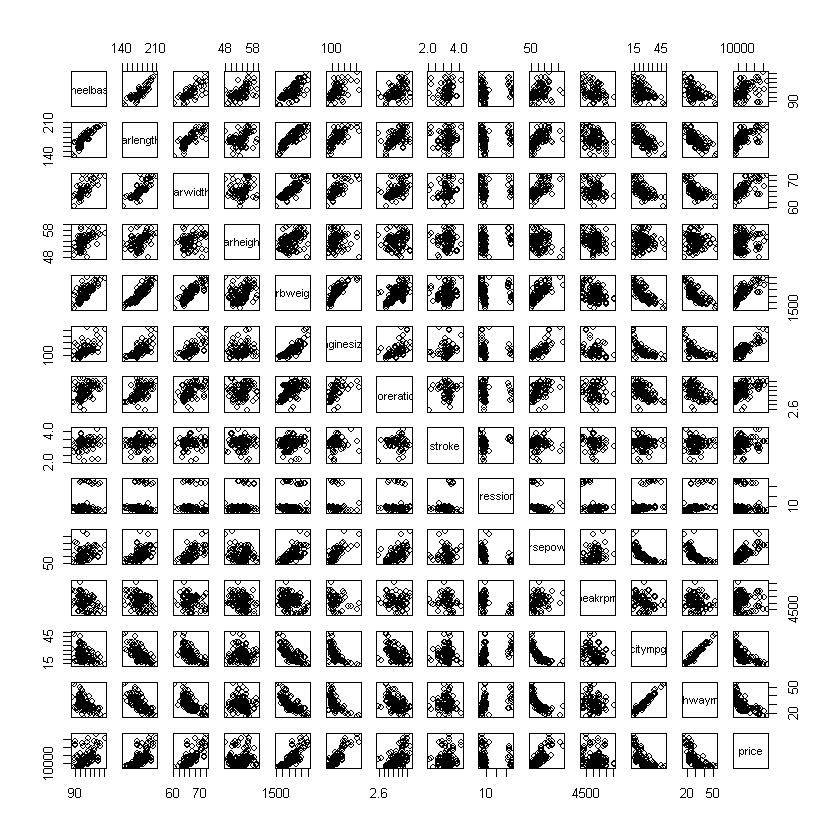

In [43]:
pairs(as.data.frame(da))

In [44]:
# 建立多元线性回归模型
car.lm <- lm(price~.,data=da)

car.lm


Call:
lm(formula = price ~ ., data = da)

Coefficients:
     (Intercept)         wheelbase         carlength          carwidth  
      -47495.741           122.617           -94.675           505.572  
       carheight        curbweight        enginesize         boreratio  
         163.180             1.885           117.346         -1002.565  
          stroke  compressionratio        horsepower           peakrpm  
       -3034.606           298.137            30.809             2.375  
         citympg        highwaympg  
        -320.355           202.822  


In [45]:
summary(car.lm)


Call:
lm(formula = price ~ ., data = da)

Residuals:
     Min       1Q   Median       3Q      Max 
-10789.3  -1671.5   -188.7   1628.8  14243.7 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.750e+04  1.527e+04  -3.111 0.002154 ** 
wheelbase         1.226e+02  1.005e+02   1.220 0.223782    
carlength        -9.468e+01  5.556e+01  -1.704 0.089986 .  
carwidth          5.056e+02  2.460e+02   2.055 0.041235 *  
carheight         1.632e+02  1.357e+02   1.202 0.230727    
curbweight        1.885e+00  1.737e+00   1.085 0.279395    
enginesize        1.173e+02  1.384e+01   8.481 6.04e-15 ***
boreratio        -1.003e+03  1.196e+03  -0.838 0.402850    
stroke           -3.035e+03  7.786e+02  -3.897 0.000134 ***
compressionratio  2.981e+02  8.291e+01   3.596 0.000412 ***
horsepower        3.081e+01  1.622e+01   1.900 0.058959 .  
peakrpm           2.375e+00  6.709e-01   3.540 0.000502 ***
citympg          -3.204e+02  1.778e+02  -1.802 0.073110 .  

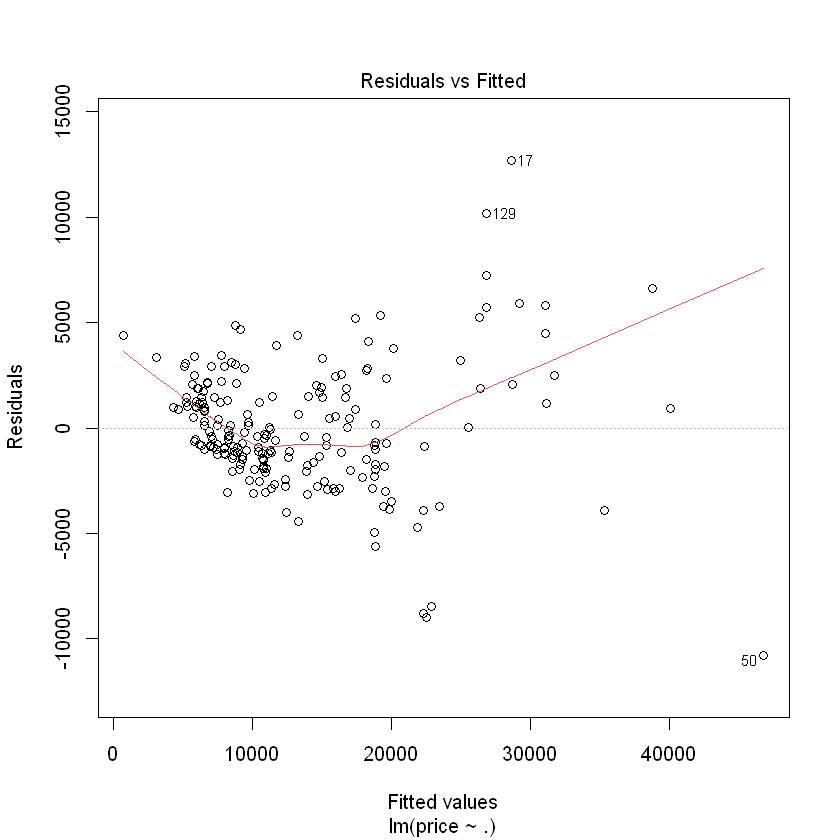

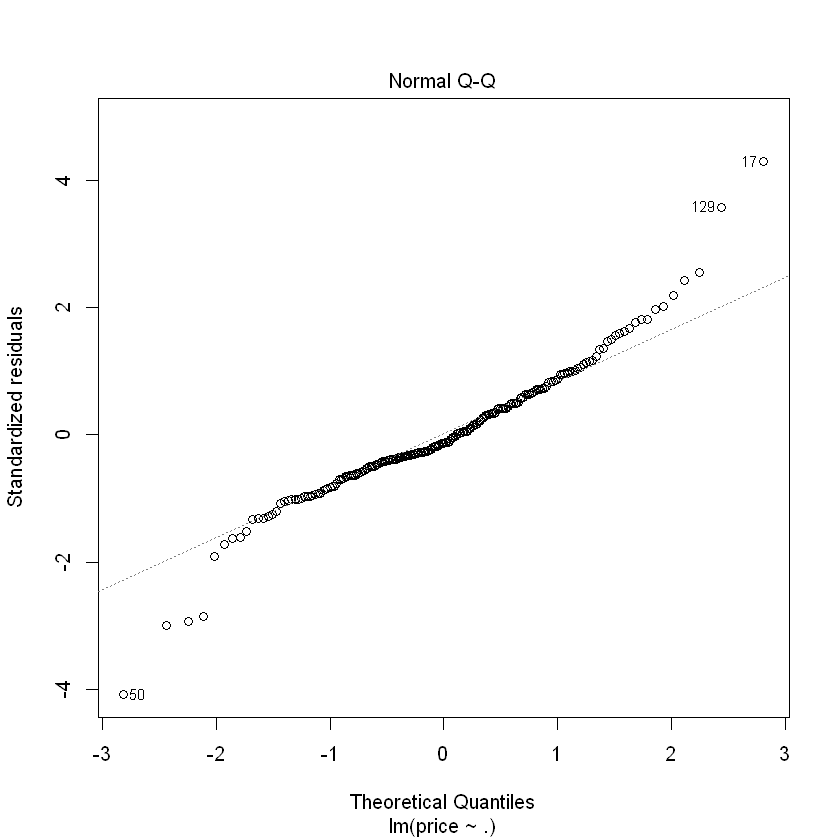

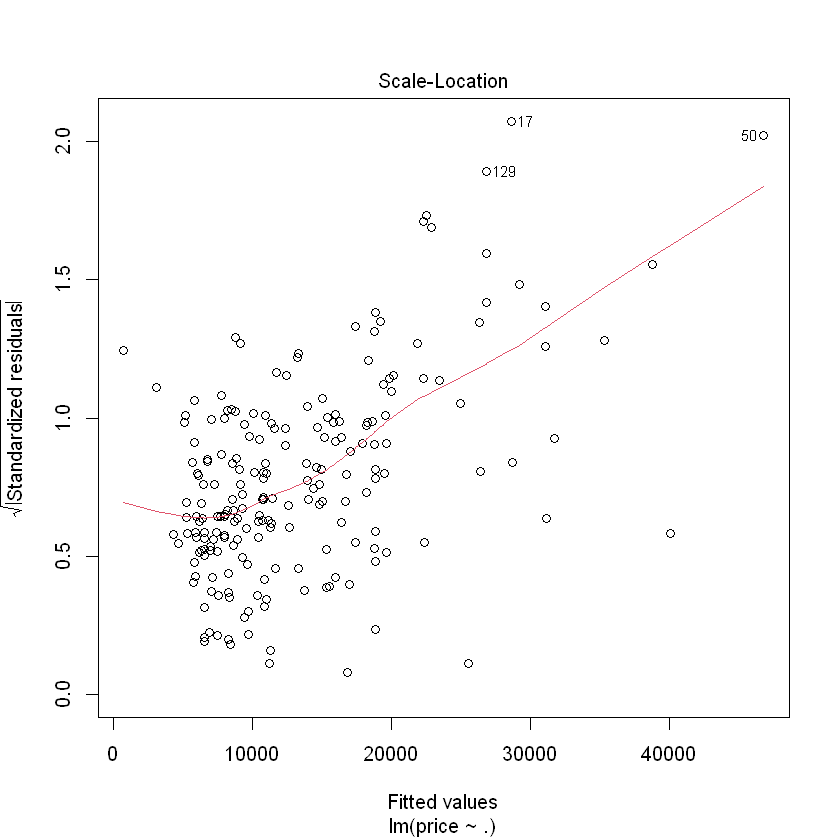

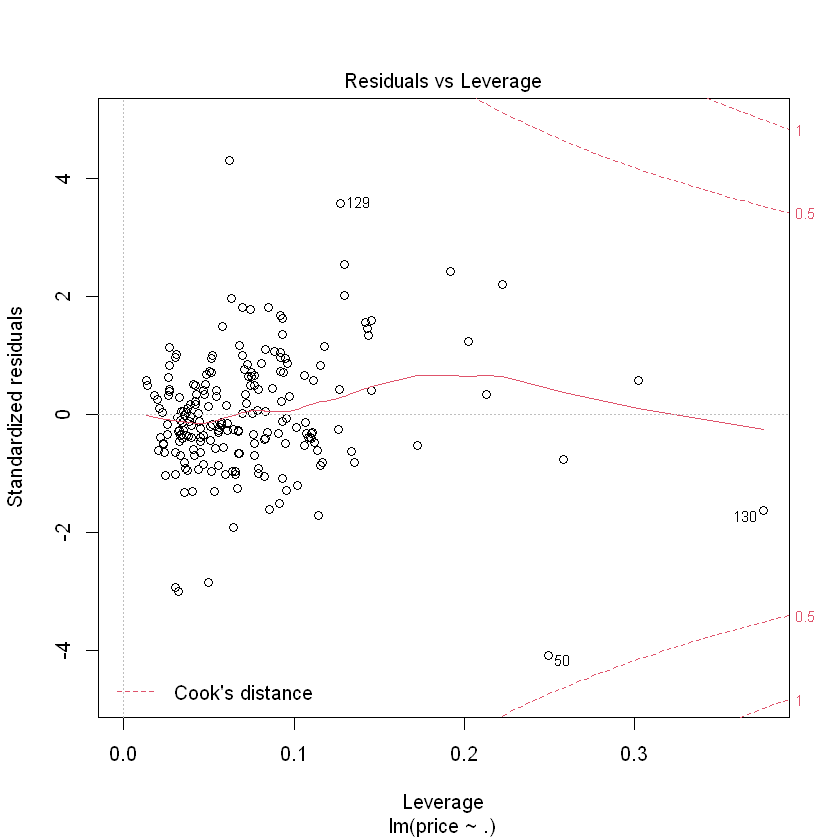

In [17]:
plot(car.lm)

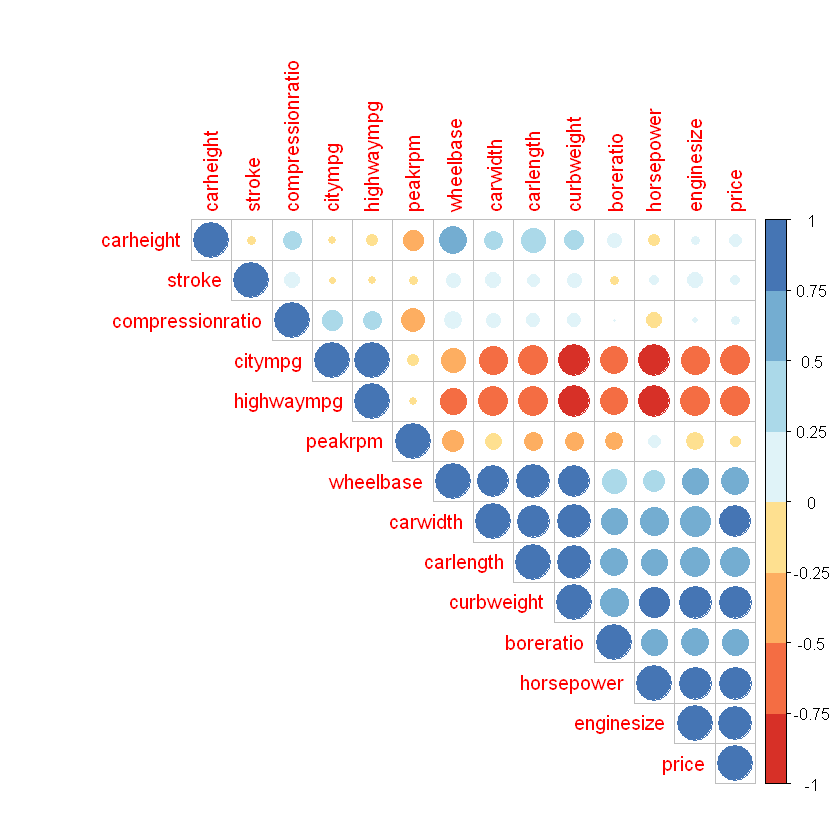

In [46]:
# 相关系数矩阵
library(corrplot)
library(RColorBrewer)
M <- cor(da)
corrplot(M,type = "upper", # 只显示上三角
        order = "hclust",col = brewer.pal(n = 8,name = "RdYlBu"))

In [47]:
# 可以看到明显的异常点17，50，129，130
da.new <- da[c(-17,-50,-129,-130),]
head(da.new)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
6,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


In [48]:
# 建立多元线性回归模型
car.lm.new <- lm(price~.,data=da.new)

car.lm.new


Call:
lm(formula = price ~ ., data = da.new)

Coefficients:
     (Intercept)         wheelbase         carlength          carwidth  
      -50398.026           159.876          -120.795           734.969  
       carheight        curbweight        enginesize         boreratio  
          75.752             1.586           116.959         -1858.315  
          stroke  compressionratio        horsepower           peakrpm  
       -3661.621           300.705            37.865             1.947  
         citympg        highwaympg  
        -286.912           190.137  


In [49]:
summary(car.lm.new)


Call:
lm(formula = price ~ ., data = da.new)

Residuals:
    Min      1Q  Median      3Q     Max 
-8875.7 -1506.3  -258.1  1691.6  7289.8 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -5.040e+04  1.425e+04  -3.536 0.000512 ***
wheelbase         1.599e+02  8.886e+01   1.799 0.073611 .  
carlength        -1.208e+02  5.035e+01  -2.399 0.017408 *  
carwidth          7.350e+02  2.276e+02   3.229 0.001466 ** 
carheight         7.575e+01  1.220e+02   0.621 0.535432    
curbweight        1.586e+00  1.538e+00   1.031 0.303778    
enginesize        1.170e+02  1.303e+01   8.975 2.99e-16 ***
boreratio        -1.858e+03  1.075e+03  -1.728 0.085564 .  
stroke           -3.662e+03  7.165e+02  -5.111 7.89e-07 ***
compressionratio  3.007e+02  7.444e+01   4.040 7.81e-05 ***
horsepower        3.787e+01  1.569e+01   2.414 0.016756 *  
peakrpm           1.947e+00  5.967e-01   3.262 0.001313 ** 
citympg          -2.869e+02  1.581e+02  -1.814 0.071204 .  
highw

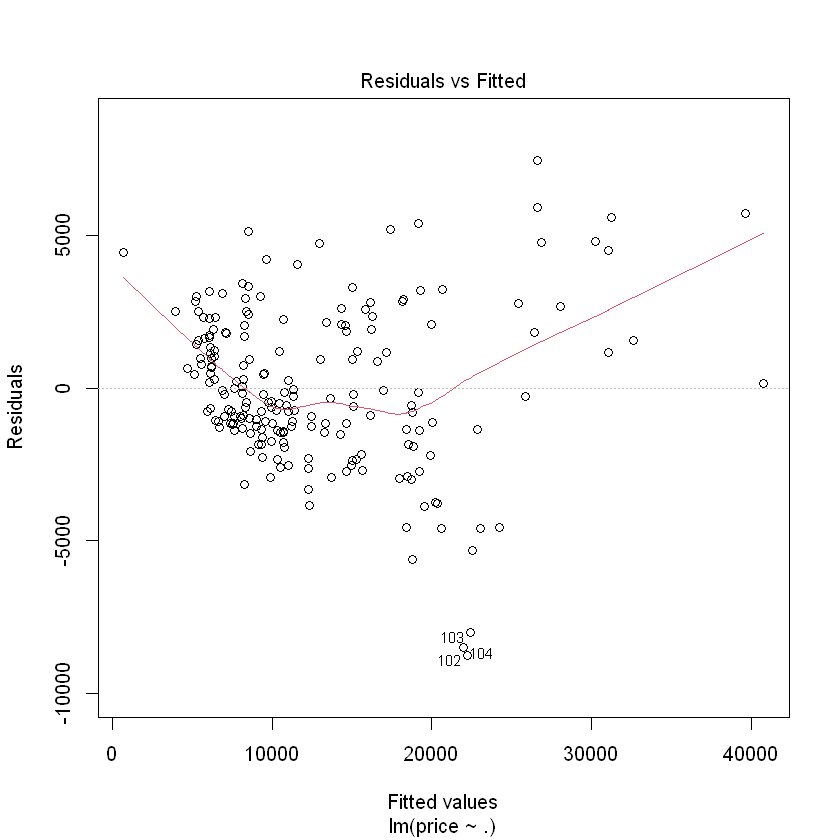

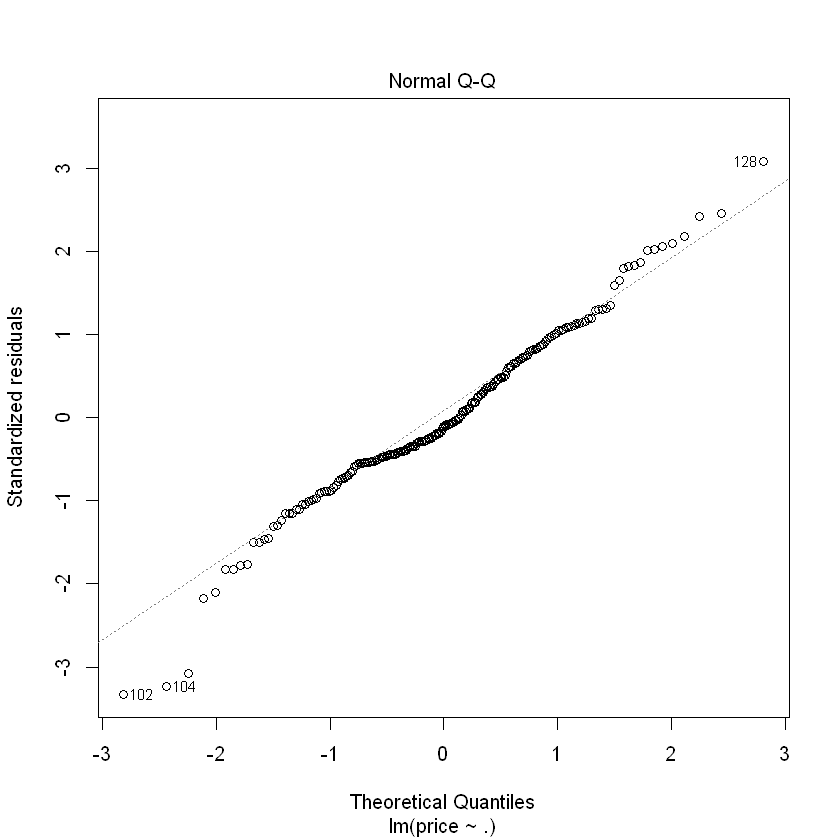

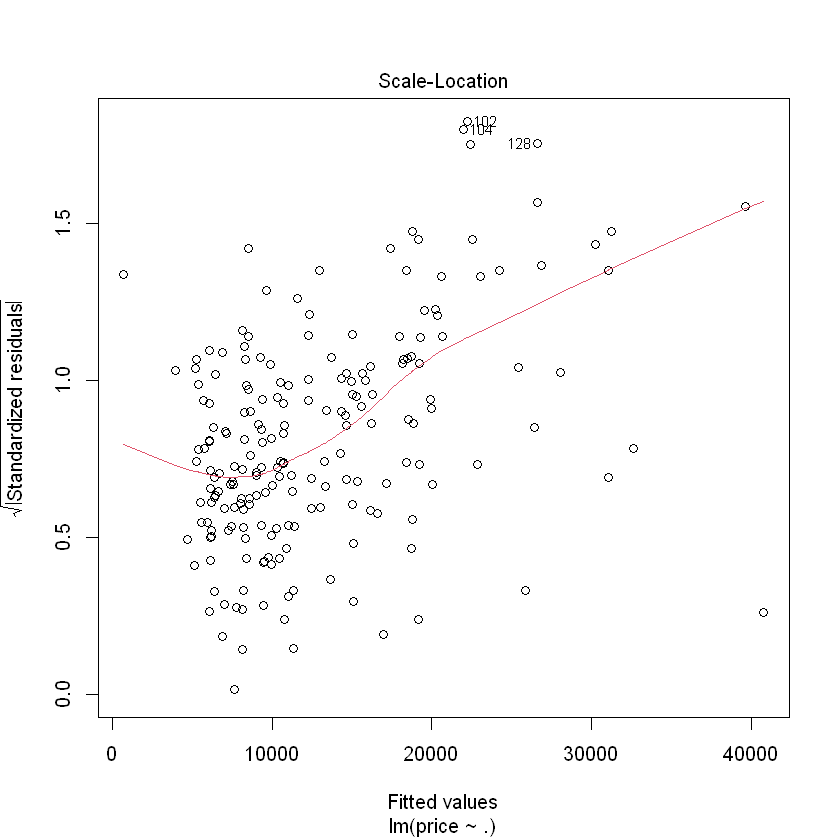

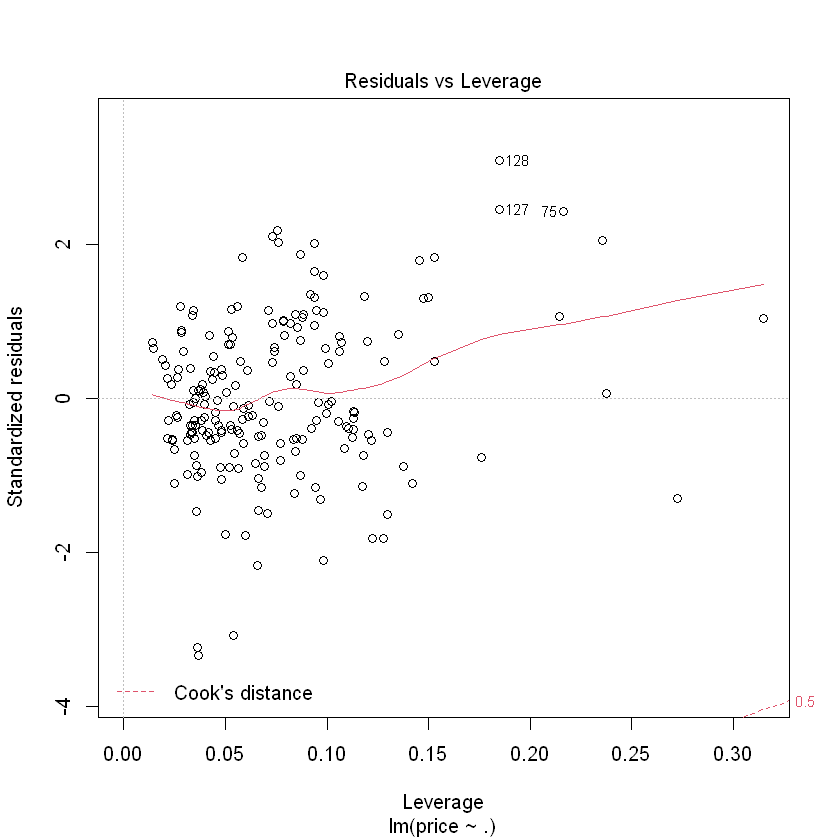

In [39]:
plot(car.lm.new)

In [52]:
# 逐步回归
car.lm.new.step <- step(car.lm.new,direction="both")

Start:  AIC=3205.79
price ~ wheelbase + carlength + carwidth + carheight + curbweight + 
    enginesize + boreratio + stroke + compressionratio + horsepower + 
    peakrpm + citympg + highwaympg

                   Df Sum of Sq        RSS    AIC
- carheight         1   3044511 1479902188 3204.2
- curbweight        1   8398159 1485255837 3204.9
- highwaympg        1  13496468 1490354146 3205.6
<none>                          1476857678 3205.8
- boreratio         1  23593538 1500451215 3207.0
- wheelbase         1  25563608 1502421285 3207.2
- citympg           1  26002110 1502859787 3207.3
- carlength         1  45464180 1522321858 3209.9
- horsepower        1  46011114 1522868792 3210.0
- carwidth          1  82357346 1559215024 3214.7
- peakrpm           1  84053265 1560910943 3214.9
- compressionratio  1 128877383 1605735060 3220.6
- stroke            1 206278914 1683136591 3230.1
- enginesize        1 636157542 2113015220 3275.8

Step:  AIC=3204.2
price ~ wheelbase + carlength + car

In [53]:
summary(car.lm.new.step)


Call:
lm(formula = price ~ wheelbase + carlength + carwidth + enginesize + 
    boreratio + stroke + compressionratio + horsepower + peakrpm + 
    citympg, data = da.new)

Residuals:
    Min      1Q  Median      3Q     Max 
-8770.2 -1454.3  -334.7  1706.4  7519.5 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.628e+04  1.276e+04  -3.626  0.00037 ***
wheelbase         1.705e+02  7.960e+01   2.143  0.03342 *  
carlength        -8.890e+01  4.579e+01  -1.941  0.05370 .  
carwidth          7.204e+02  2.187e+02   3.295  0.00118 ** 
enginesize        1.192e+02  1.216e+01   9.799  < 2e-16 ***
boreratio        -1.907e+03  1.072e+03  -1.780  0.07666 .  
stroke           -3.650e+03  6.992e+02  -5.221 4.65e-07 ***
compressionratio  3.278e+02  6.754e+01   4.854 2.52e-06 ***
horsepower        4.188e+01  1.504e+01   2.784  0.00591 ** 
peakrpm           1.808e+00  5.861e-01   3.084  0.00235 ** 
citympg          -1.259e+02  7.070e+01  -1.781  0.07649 . 

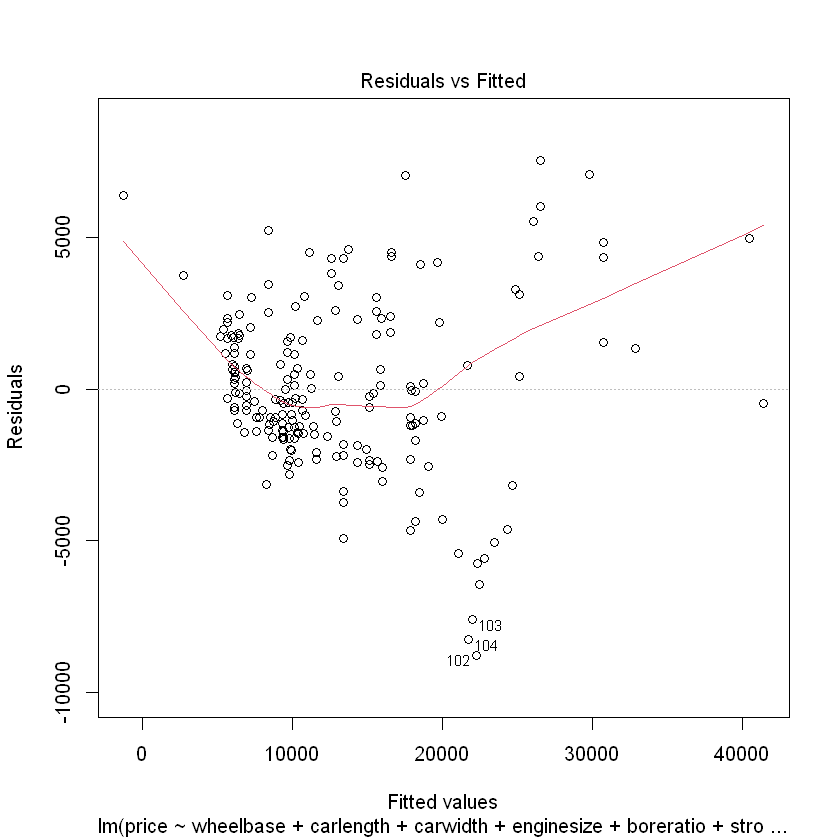

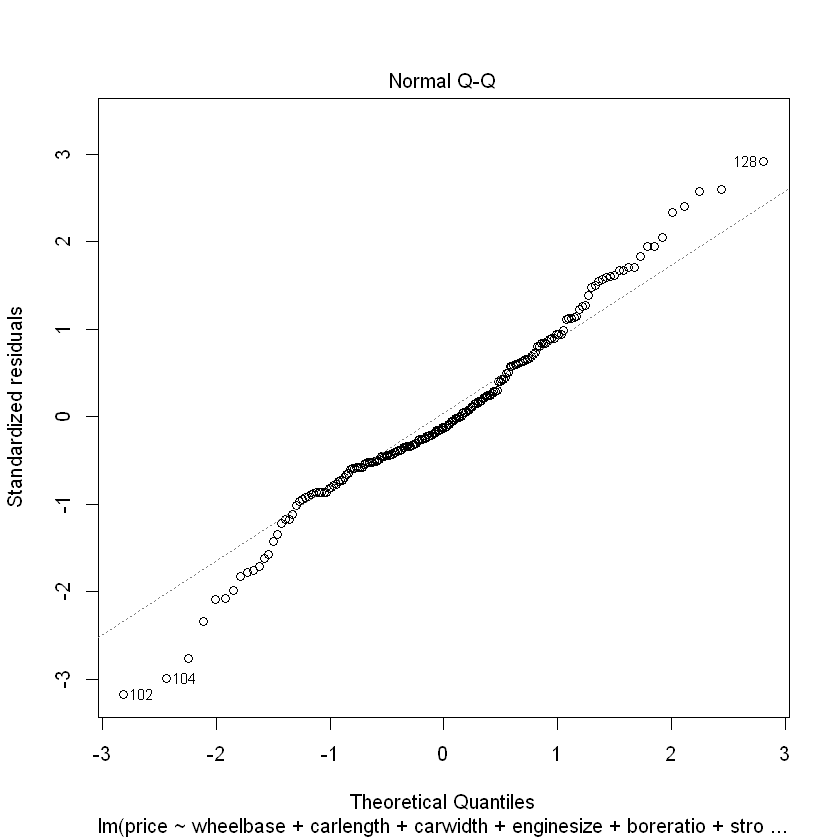

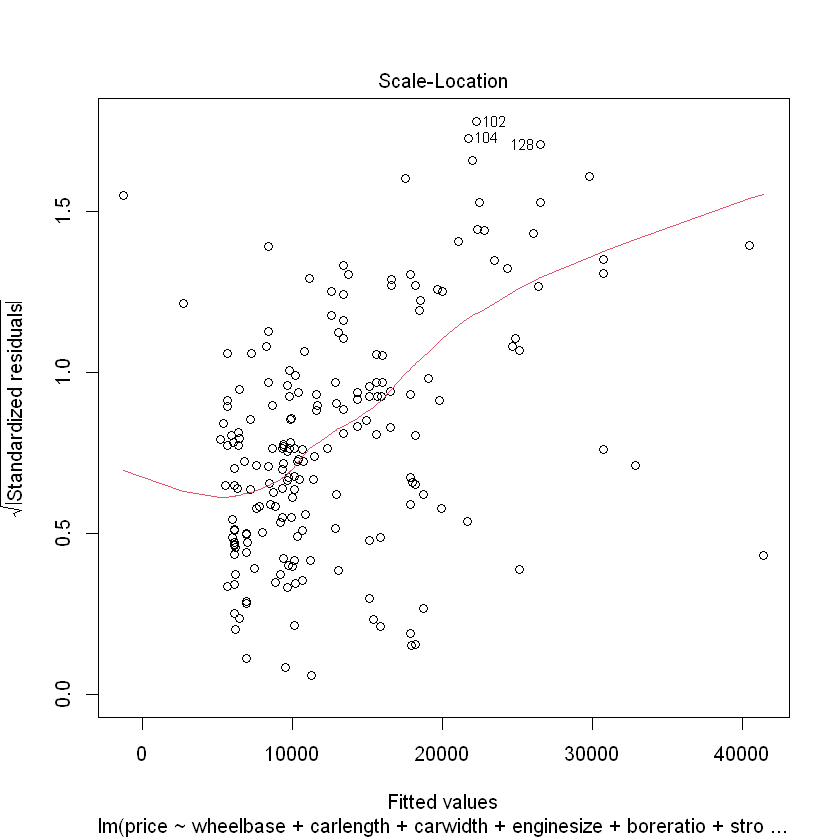

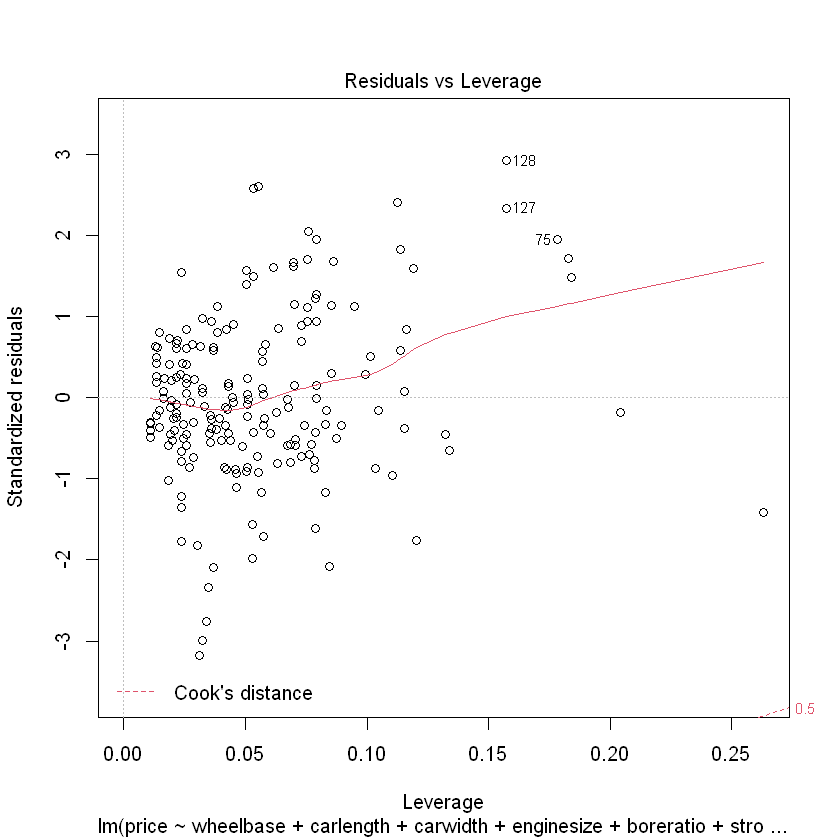

In [54]:
plot(car.lm.new.step)

The following objects are masked from da.all (pos = 3):

    boreratio, car_ID, carheight, carlength, carwidth, citympg,
    compressionratio, curbweight, enginesize, highwaympg, horsepower,
    peakrpm, price, stroke, wheelbase


The following objects are masked from da.all (pos = 4):

    boreratio, car_ID, carheight, carlength, carwidth, citympg,
    compressionratio, curbweight, enginesize, highwaympg, horsepower,
    peakrpm, price, stroke, wheelbase


The following objects are masked from da.all (pos = 5):

    boreratio, car_ID, carheight, carlength, carwidth, citympg,
    compressionratio, curbweight, enginesize, highwaympg, horsepower,
    peakrpm, price, stroke, wheelbase


The following objects are masked from da.all (pos = 6):

    boreratio, car_ID, carheight, carlength, carwidth, citympg,
    compressionratio, curbweight, enginesize, highwaympg, horsepower,
    peakrpm, price, stroke, wheelbase


The following objects are masked from da:

    boreratio, carheight, carleng

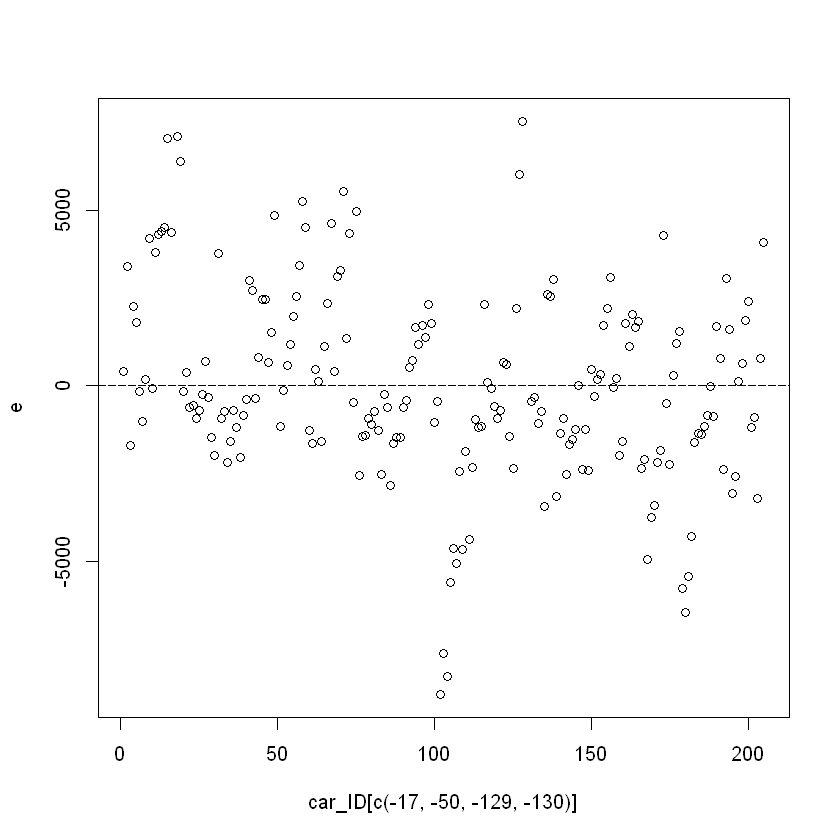

In [65]:
# 异方差检验与修正
e<-resid(car.lm.new.step)  # 计算残差
attach(da.all)
plot(car_ID[c(-17,-50,-129,-130)],e)
abline(h=c(0),lty=5)  # 添加虚线e=0
detach(da.all)

In [68]:
abse<-abs(e)
cor.test(da.all$car_ID[c(-17,-50,-129,-130)],abse,alternative="two.sided",method="spearman",conf.level=0.95)

Warning message in cor.test.default(da.all$car_ID[c(-17, -50, -129, -130)], abse, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  da.all$car_ID[c(-17, -50, -129, -130)] and abse
S = 1297164, p-value = 0.5581
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04155171 


In [73]:
# 异方差修正 加权最小二乘
fit <- lm(log(resid(car.lm.new.step)^2) ~ wheelbase + carlength + carwidth + carheight + curbweight + 
    enginesize + boreratio + stroke + compressionratio + horsepower + 
    peakrpm + citympg + highwaympg, data=da.new)
fit2 = lm(price ~ wheelbase + carlength + carwidth + carheight + curbweight + 
    enginesize + boreratio + stroke + compressionratio + horsepower + 
    peakrpm + citympg + highwaympg, data=da.new,weights=(1/exp(fitted(fit))))

In [74]:
summary(fit2)


Call:
lm(formula = price ~ wheelbase + carlength + carwidth + carheight + 
    curbweight + enginesize + boreratio + stroke + compressionratio + 
    horsepower + peakrpm + citympg + highwaympg, data = da.new, 
    weights = (1/exp(fitted(fit))))

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3.1676 -1.1525 -0.3605  1.1715  4.9434 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.119e+04  1.079e+04  -3.815 0.000185 ***
wheelbase         6.462e+01  6.906e+01   0.936 0.350637    
carlength        -6.408e+01  3.673e+01  -1.744 0.082724 .  
carwidth          6.872e+02  1.638e+02   4.196 4.20e-05 ***
carheight         2.657e+01  8.825e+01   0.301 0.763691    
curbweight        4.747e+00  1.259e+00   3.770 0.000219 ***
enginesize        6.007e+01  1.402e+01   4.286 2.91e-05 ***
boreratio        -3.616e+03  9.960e+02  -3.631 0.000365 ***
stroke           -2.862e+03  6.198e+02  -4.617 7.22e-06 ***
compressionratio  1.628e+02  5.472

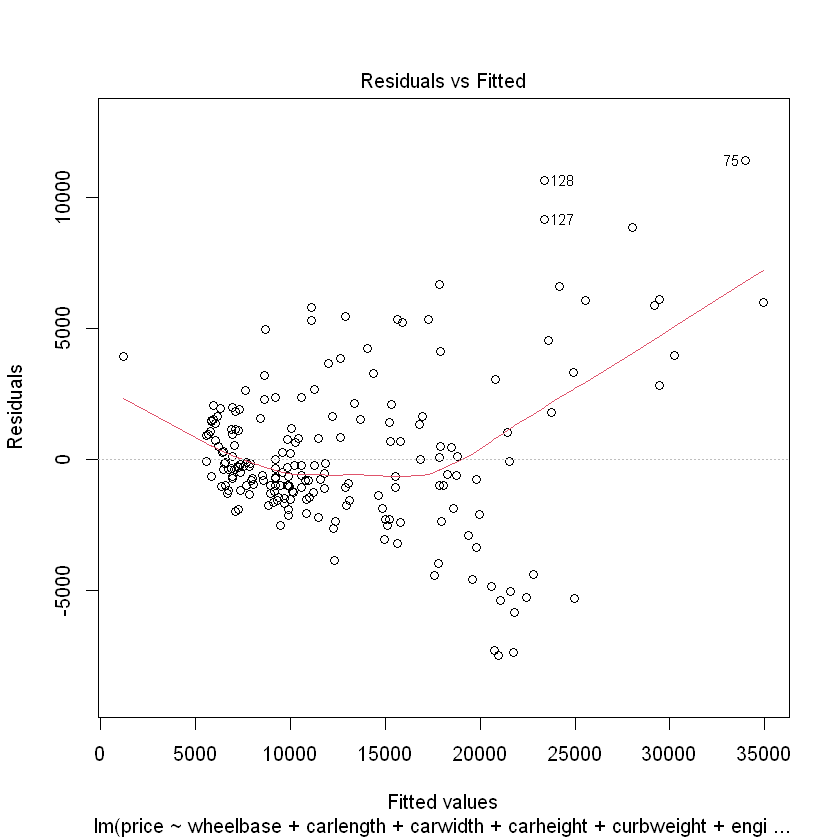

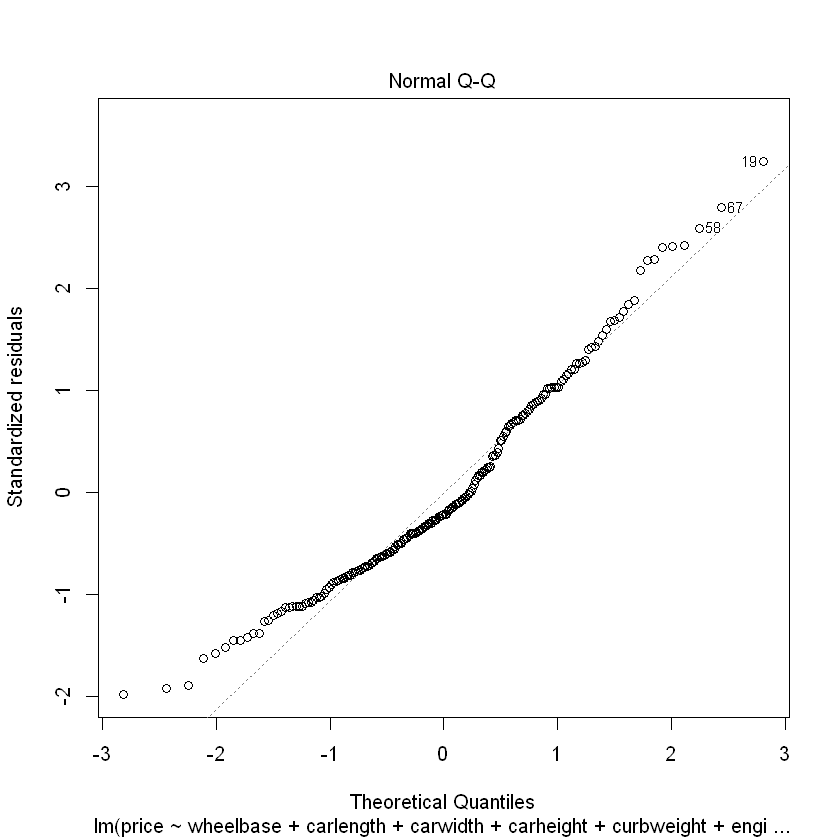

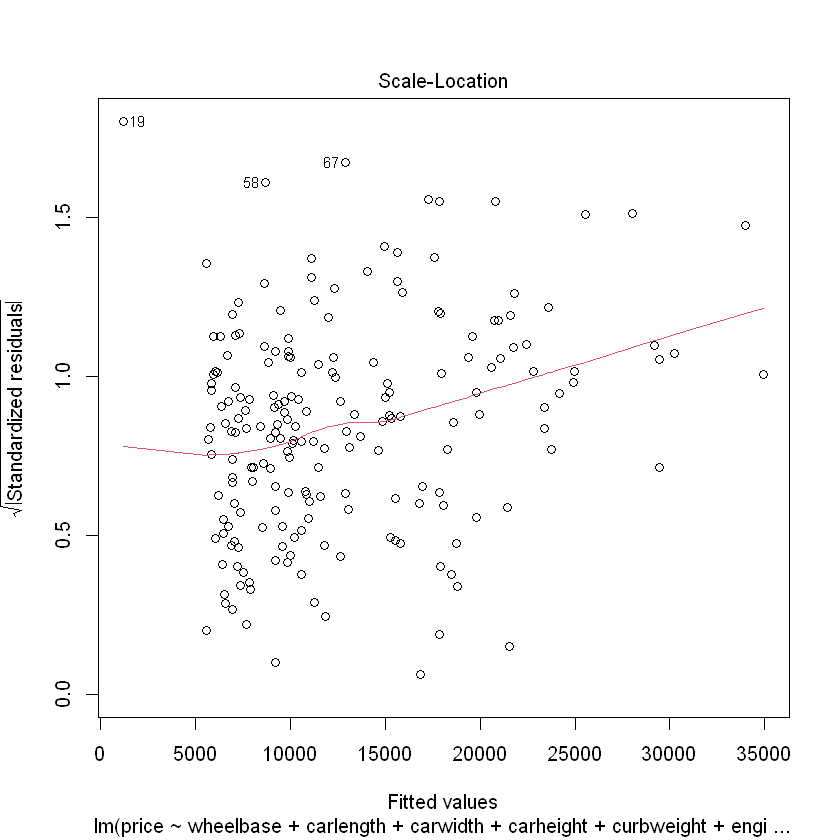

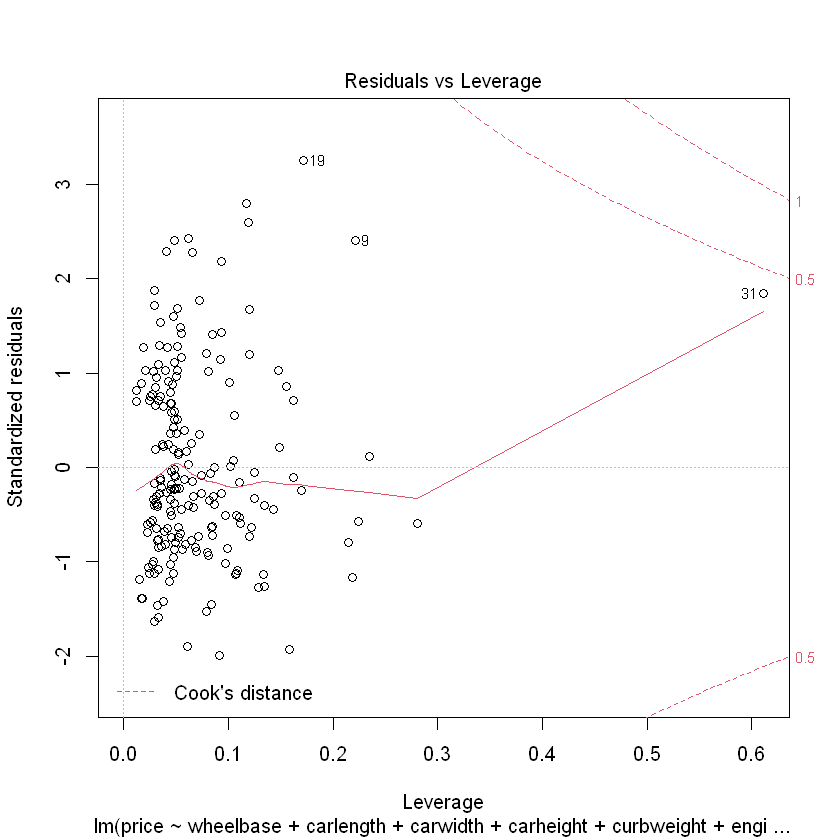

In [75]:
plot(fit2)

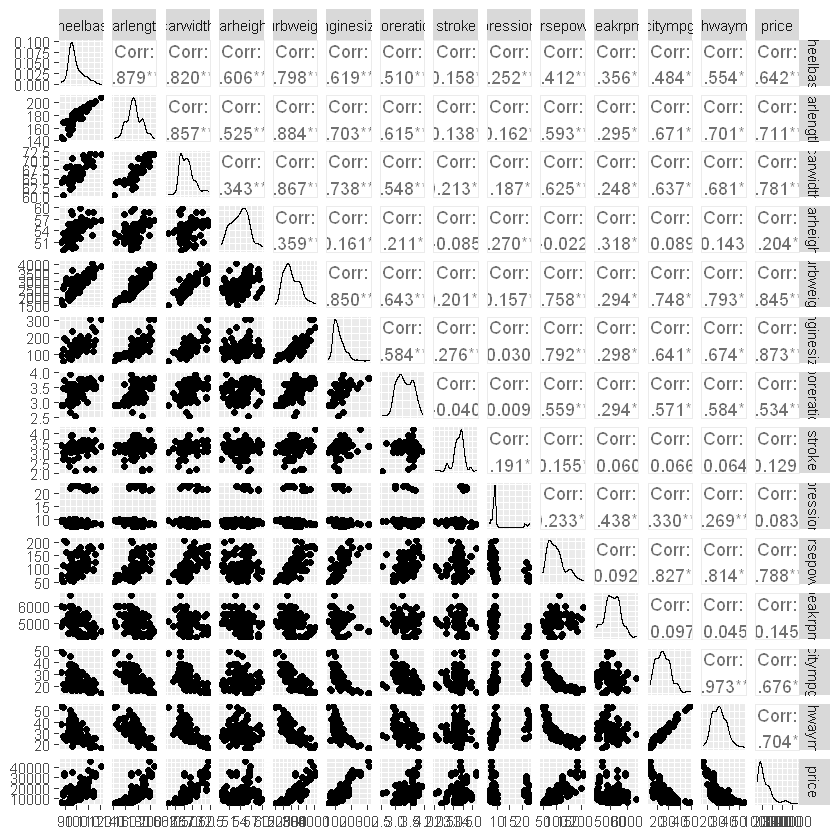

In [78]:
library('GGally')
ggpairs(data=da.new)

In [81]:
ans <- predict(fit2,interval="prediction",level=0.95)

Warning message in predict.lm(fit2, interval = "prediction", level = 0.95):
"predictions on current data refer to _future_ responses
"
Warning message in predict.lm(fit2, interval = "prediction", level = 0.95):
"assuming prediction variance inversely proportional to weights used for fitting
"


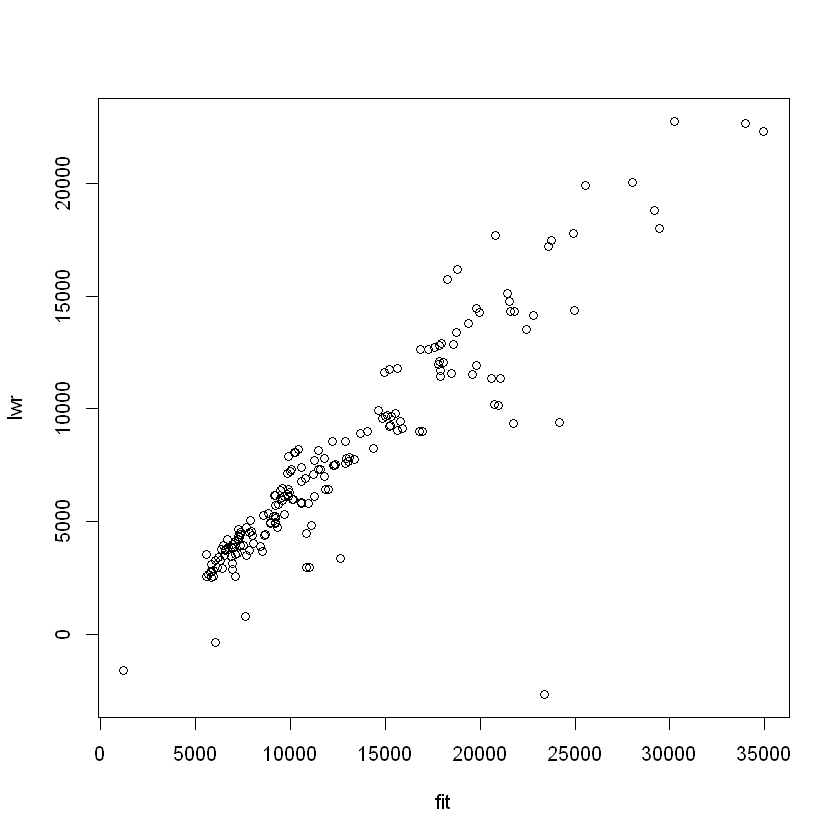

In [85]:
plot(ans)

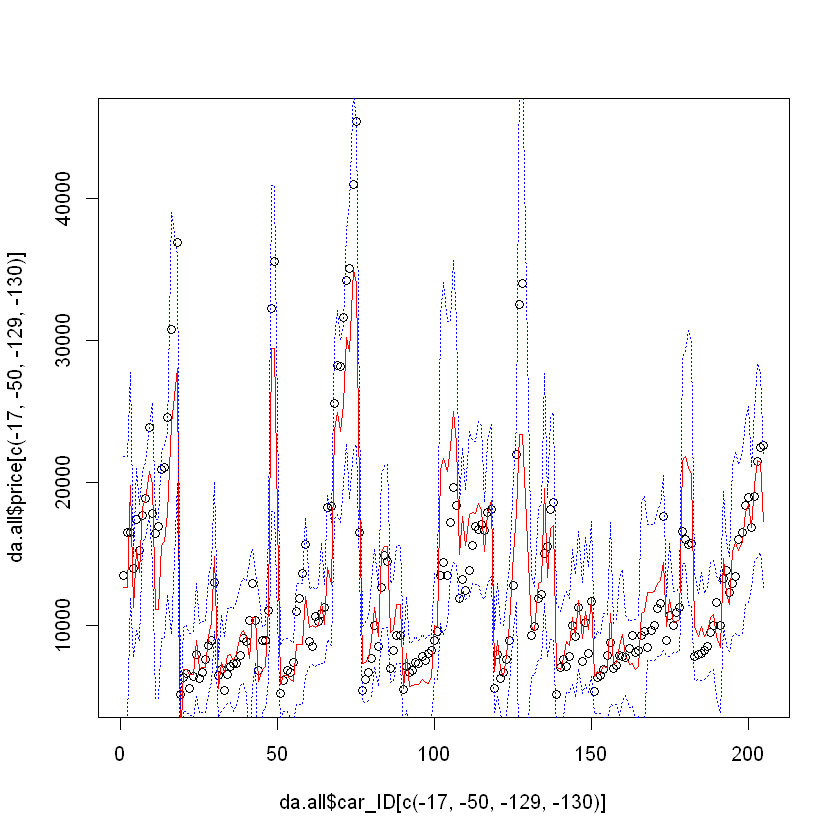

In [90]:
plot(da.all$car_ID[c(-17,-50,-129,-130)],da.all$price[c(-17,-50,-129,-130)])
lines(da.all$car_ID[c(-17,-50,-129,-130)],ans[,1],lty=1,col="red")
lines(da.all$car_ID[c(-17,-50,-129,-130)],ans[,2],lty=3,col="blue")
lines(da.all$car_ID[c(-17,-50,-129,-130)],ans[,3],lty=3,col="blue")